In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
session_info.show()

In [3]:
%matplotlib inline

sns.set_style('darkgrid')

## Load the Data

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

passengers = pd.concat([train, test], sort=False)

passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Clean the Data

In [5]:
passengers.Sex.unique()

array(['male', 'female'], dtype=object)

Replace the sex column with a numerical column, 1: male; 2: female

In [6]:
passengers['Sex'] = passengers['Sex'].replace({'male': 1, 'female': 0})
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [7]:
passengers.Age.values

array([22. , 38. , 26. , ..., 38.5,  nan,  nan])

Age column has missing values. Replace the missing values with the median age.

In [8]:
passengers.Age.mean()

29.881137667304014

In [9]:
passengers.Age.fillna(passengers.Age.mean(), inplace=True)
passengers.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.88113767,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [10]:
passengers['FirstClass'] = passengers['Pclass'].apply(
    lambda x: 1 if x == 1 else 0)
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
passengers['SecondClass'] = passengers['Pclass'].apply(
    lambda x: 1 if x == 2 else 0)

passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0


In [12]:
passengers['Survived'] = passengers['Survived'].dropna().astype(int)


In [13]:
passengers['Survived'].unique()

array([0, 1])

## Split the Data

In [14]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, survival, test_size=0.2)

## Normalize the Data

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Create the Model

In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
model.score(x_train, y_train)

0.7125119388729704

In [19]:
model.score(x_test, y_test)

0.6984732824427481

In [20]:
print(list(zip(['Sex','Age','FirstClass','SecondClass'],model.coef_[0])))

[('Sex', -0.6754794571294329), ('Age', -0.2622497457994689), ('FirstClass', 0.5743390774549434), ('SecondClass', 0.36129872798991974)]


## Predict

In [21]:
Jack = np.array([1, 20.0, 0, 0])
Rose = np.array([0, 17.0, 1, 0])
You = np.array([1, 18.0, 0, 1])

sample_passengers = np.array([Jack, Rose, You])

In [22]:
sample_passengers = scaler.transform(sample_passengers)

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
model.predict(sample_passengers)

array([0, 1, 0])

In [24]:
model.predict_proba(sample_passengers)

array([[0.79781963, 0.20218037],
       [0.19362547, 0.80637453],
       [0.61302778, 0.38697222]])

In [25]:
print(model.predict_proba(sample_passengers)[:,1]) # probability of survival

[0.20218037 0.80637453 0.38697222]


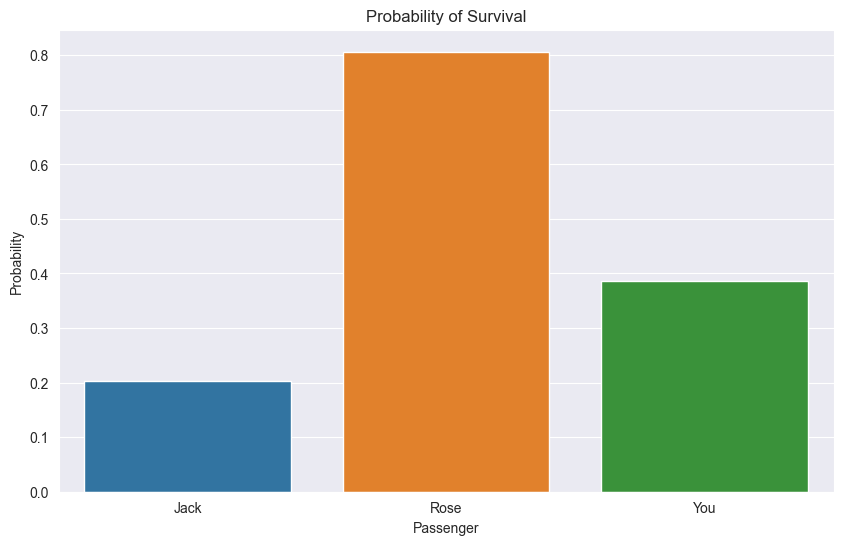

In [26]:
plt.figure(figsize=(10, 6))

(
    sns.barplot(
        x=['Jack', 'Rose', 'You'],
        y=model.predict_proba(sample_passengers)[:,1]
    )
    .set_title('Probability of Survival')
)

plt.xlabel('Passenger')
plt.ylabel('Probability')

plt.show()

In [27]:
confusion_matrix(y_test, model.predict(x_test))

array([[143,  18],
       [ 61,  40]], dtype=int64)

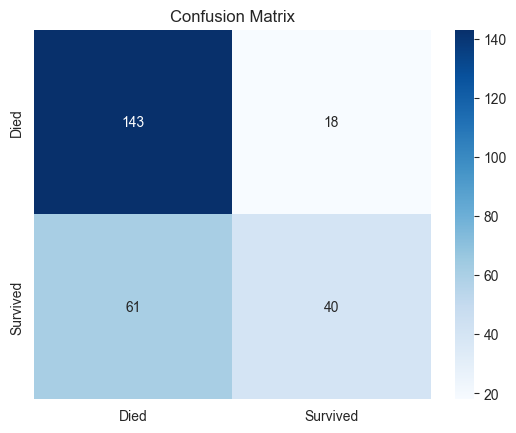

In [28]:
matrix = confusion_matrix(y_test, model.predict(x_test))

(
    sns.heatmap(
        matrix,
        annot=True,
        fmt='d',
        xticklabels=['Died', 'Survived'],
        yticklabels=['Died', 'Survived'],
        cmap='Blues'
    )
)

# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

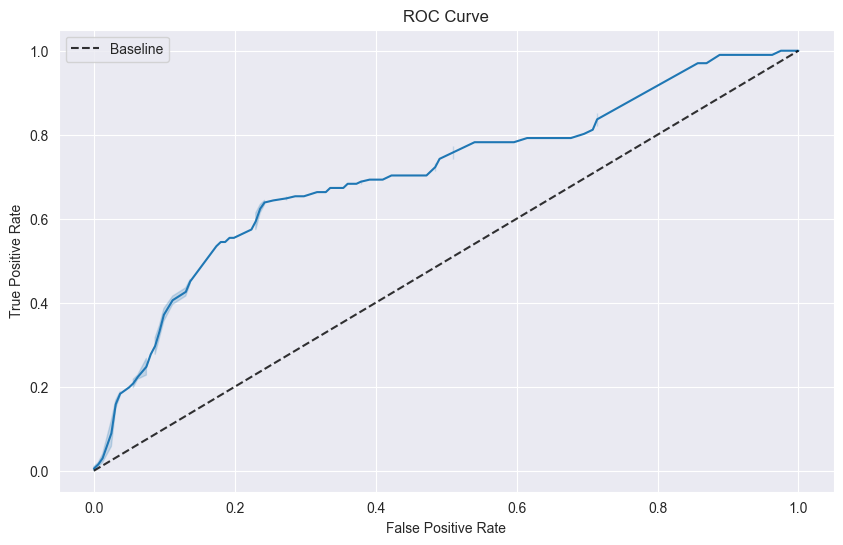

In [30]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Baseline', alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.show()

In [31]:
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7066293585880326


In [32]:
report = classification_report(y_test, model.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       161
           1       0.69      0.40      0.50       101

    accuracy                           0.70       262
   macro avg       0.70      0.64      0.64       262
weighted avg       0.70      0.70      0.68       262



In [33]:
with open('results/report.txt', 'w') as f:
    f.write(report)